## Import Libraries & Read Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('videos.csv')

## First Look At Data

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   id          500 non-null    object
 2   date        500 non-null    object
 3   title       500 non-null    object
 4   tags        500 non-null    object
 5   duration    500 non-null    object
 6   views       500 non-null    int64 
 7   likes       500 non-null    int64 
 8   comments    500 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 35.3+ KB
None


,Unnamed: 0,id,date,title,tags,duration,views,likes,comments
0,0,L44inAV0X_A,2023-07-12T15:06:33Z,Premier League goalkeepers with the MOST SAVES...,"['most saves', 'saves', 'save', 'best saves', ...",PT8M43S,37259,1670,135
1,1,abona-GsR94,2023-07-12T10:03:30Z,Ten Hag Ball! Started by De Gea & finished by ...,"['Ten Hag Ball', 'Erik ten Hag Ball', 'Erik te...",PT20S,1860938,85403,321
2,2,ZrtCPrP7DDI,2023-07-11T15:10:08Z,1 AMAZING Premier League goal scored by EVERY ...,"['1 amazing premier league goal', '1 amazing g...",PT8M57S,171598,4395,172
3,3,kjcYVg4VU8Q,2023-07-11T11:34:40Z,Brilliant Vinícius pass & Solomon finish!,"['Manor Solomon', 'Solomon', 'Carlos Vinícius'...",PT15S,1335094,42854,147
4,4,tAu_EL7iCd0,2023-07-11T09:04:08Z,Perfect Kevin De Bruyne pass with a header!,"['Kevin De Bruyne', 'De Bruyne', 'Man City', '...",PT11S,251215,6482,62


## Data Cleaning & Adding New Features

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%SZ') #modify date data type

hours = pd.to_numeric(df['duration'].str.extract('(\d+H)').squeeze().str[:-1].fillna(0))
mins = pd.to_numeric(df['duration'].str.extract('(\d+M)').squeeze().str[:-1].fillna(0))
seconds = pd.to_numeric(df['duration'].str.extract('(\d+S)').squeeze().str[:-1].fillna(0))
df['duration'] = hours * 3600 + mins * 60 + seconds #modify duartion to seconds

#New Features
from textblob import TextBlob
df['title_polarity'] = df['title'].apply(lambda x: TextBlob(x).sentiment).str[0]
df['title_subjectivity'] = df['title'].apply(lambda x: TextBlob(x).sentiment).str[1]

df['tags'] = df['tags'].str.strip('[]').str.strip("''").str.replace("', '", ' ')

df['tag_polarity'] = df['tags'].apply(lambda x: TextBlob(x).sentiment).str[0]
df['tag_subjectivity'] = df['tags'].apply(lambda x: TextBlob(x).sentiment).str[1]

df['title_length'] = df['title'].str.len()
df['tag_count'] = df['tags'].str.len()

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['dayofweek'] = df['date'].dt.dayofweek
df['dayofyear'] = df['date'].dt.dayofyear

df = df.drop(['Unnamed: 0', 'id', 'title', 'tags'], axis=1) #drop unncessary columns

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                500 non-null    datetime64[ns]
 1   duration            500 non-null    int64         
 2   views               500 non-null    int64         
 3   likes               500 non-null    int64         
 4   comments            500 non-null    int64         
 5   title_polarity      500 non-null    float64       
 6   title_subjectivity  500 non-null    float64       
 7   tag_polarity        500 non-null    float64       
 8   tag_subjectivity    500 non-null    float64       
 9   title_length        500 non-null    int64         
 10  tag_count           500 non-null    int64         
 11  year                500 non-null    int32         
 12  month               500 non-null    int32         
 13  day                 500 non-null    int32         

,date,duration,views,likes,comments,title_polarity,title_subjectivity,tag_polarity,tag_subjectivity,title_length,tag_count,year,month,day,hour,minute,dayofweek,dayofyear
0,2023-07-12 15:06:33,523,37259,1670,135,0.5,0.5,0.875,0.350000,57,457,2023,7,12,15,6,2,193
1,2023-07-12 10:03:30,20,1860938,85403,321,0.0,0.0,0.000,0.128571,50,450,2023,7,12,10,3,2,193
2,2023-07-11 15:10:08,537,171598,4395,172,0.6,0.9,0.680,0.780000,58,454,2023,7,11,15,10,1,192
3,2023-07-11 11:34:40,15,1335094,42854,147,1.0,1.0,0.000,0.300000,41,460,2023,7,11,11,34,1,192
4,2023-07-11 09:04:08,11,251215,6482,62,1.0,1.0,0.000,0.300000,43,454,2023,7,11,9,4,1,192


## Splitting the Data

In [5]:
from sklearn import model_selection
df_train, df_test = model_selection.train_test_split(df, test_size=0.1, random_state=42)

# EDA

## The Target Variable

count    4.500000e+02
mean     6.264877e+04
std      1.719094e+05
min      6.060000e+02
25%      3.201000e+03
50%      7.947500e+03
75%      3.998775e+04
max      1.545444e+06
Name: likes, dtype: float64
skew: 5.45103247576734
kurt: 34.947292651129814


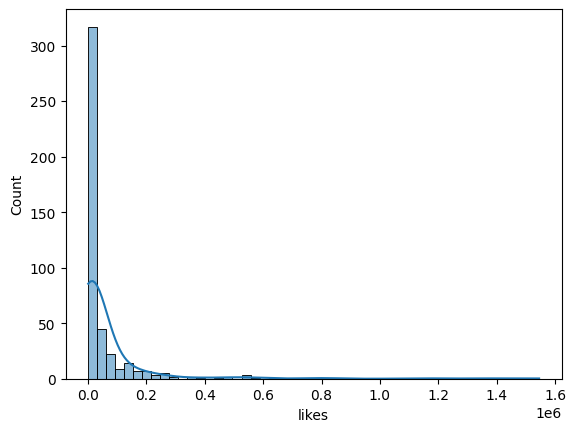

In [6]:
print(df_train['likes'].describe())
print('skew:', df_train['likes'].skew())
print('kurt:', df_train['likes'].kurt())
sns.histplot(df_train['likes'], kde=True, bins = 50)
plt.show()

## Other Features Against the Target Variable

## Numerical Features

[]

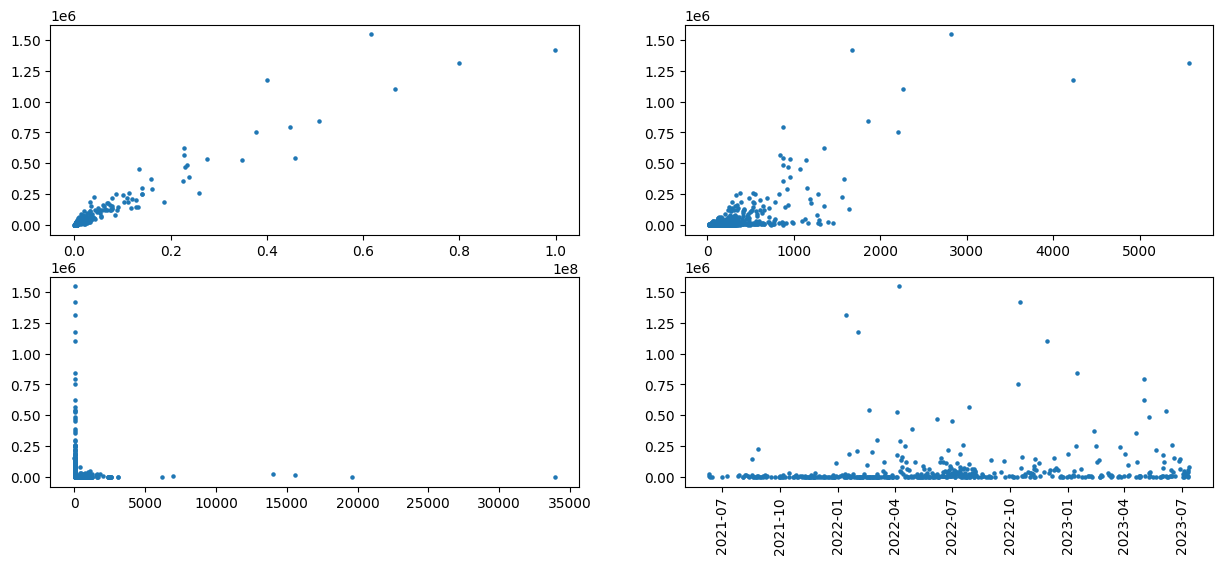

In [7]:
plt.figure(figsize = (15, 6))

plt.subplot(221)
plt.scatter(df_train['views'], df_train['likes'], s=5)

plt.subplot(222)
plt.scatter(df_train['comments'], df_train['likes'], s=5)

plt.subplot(223)
plt.scatter(df_train['duration'], df_train['likes'], s=5)

plt.subplot(224)
plt.scatter(df_train['date'], df_train['likes'], s=5)
plt.xticks(rotation=90)

plt.plot()

## Categorical Features

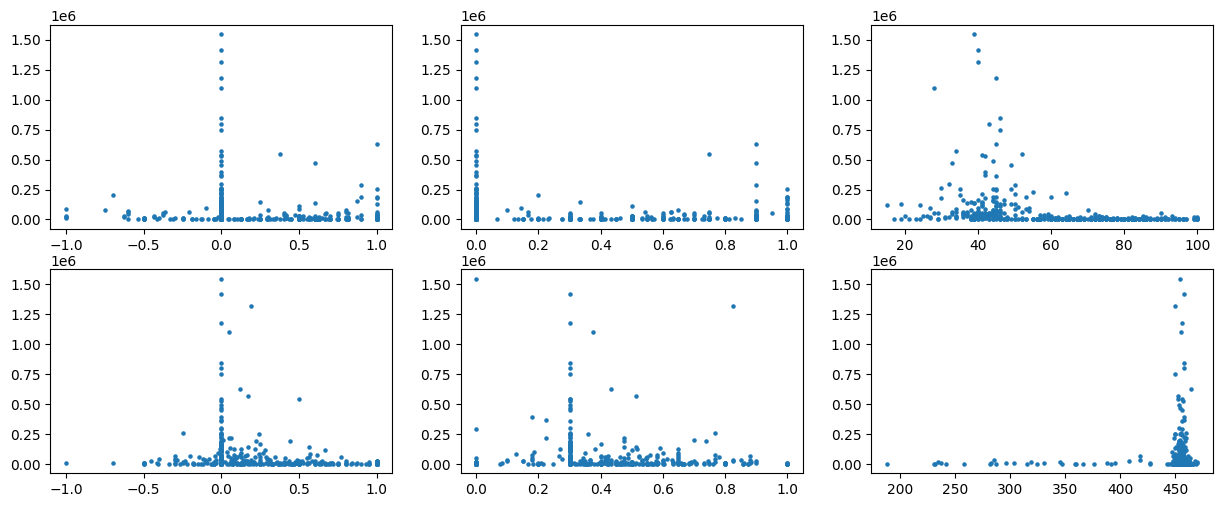

In [8]:
plt.figure(figsize = (15, 9))

plt.subplot(331)
plt.scatter(df_train['title_polarity'], df_train['likes'], s=5)

plt.subplot(332)
plt.scatter(df_train['title_subjectivity'], df_train['likes'], s=5)

plt.subplot(333)
plt.scatter(df_train['title_length'], df_train['likes'], s=5)

plt.subplot(334)
plt.scatter(df_train['tag_polarity'], df_train['likes'], s=5)

plt.subplot(335)
plt.scatter(df_train['tag_subjectivity'], df_train['likes'], s=5)

plt.subplot(336)
plt.scatter(df_train['tag_count'], df_train['likes'], s=5)

plt.show()

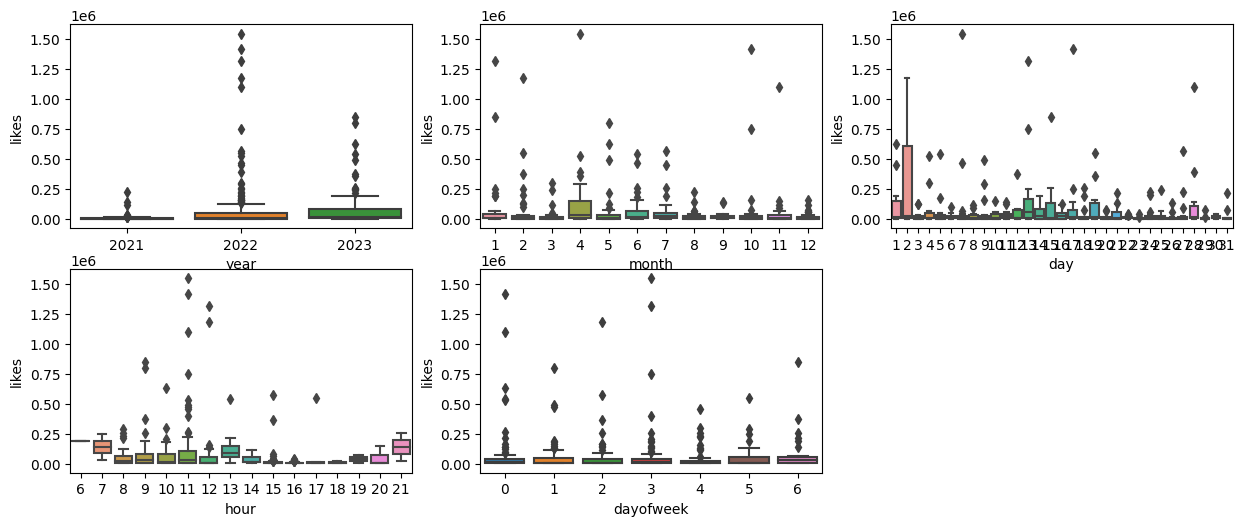

In [9]:
plt.figure(figsize = (15, 9))

plt.subplot(331)
sns.boxplot(x='year', y='likes', data=df_train)

plt.subplot(332)
sns.boxplot(x='month', y='likes', data=df_train)

plt.subplot(333)
sns.boxplot(x='day', y='likes', data=df_train)

plt.subplot(334)
sns.boxplot(x='hour', y='likes', data=df_train)

plt.subplot(335)
sns.boxplot(x='dayofweek', y='likes', data=df_train)

plt.show()


## Relation Between Features

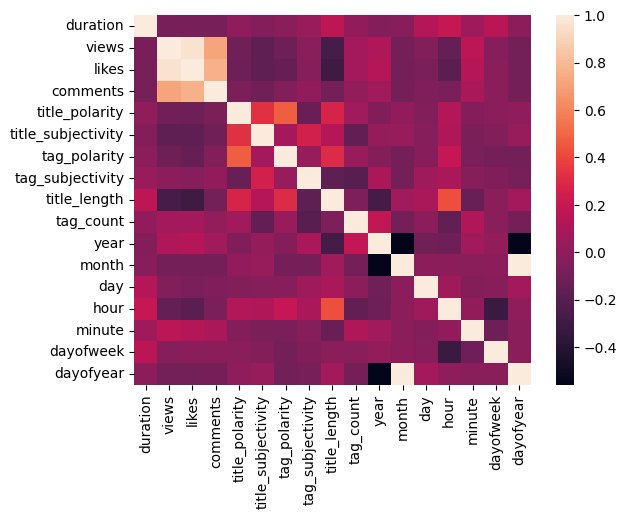

In [10]:
sns.heatmap(df_train.drop('date', axis=1).corr())
plt.show()

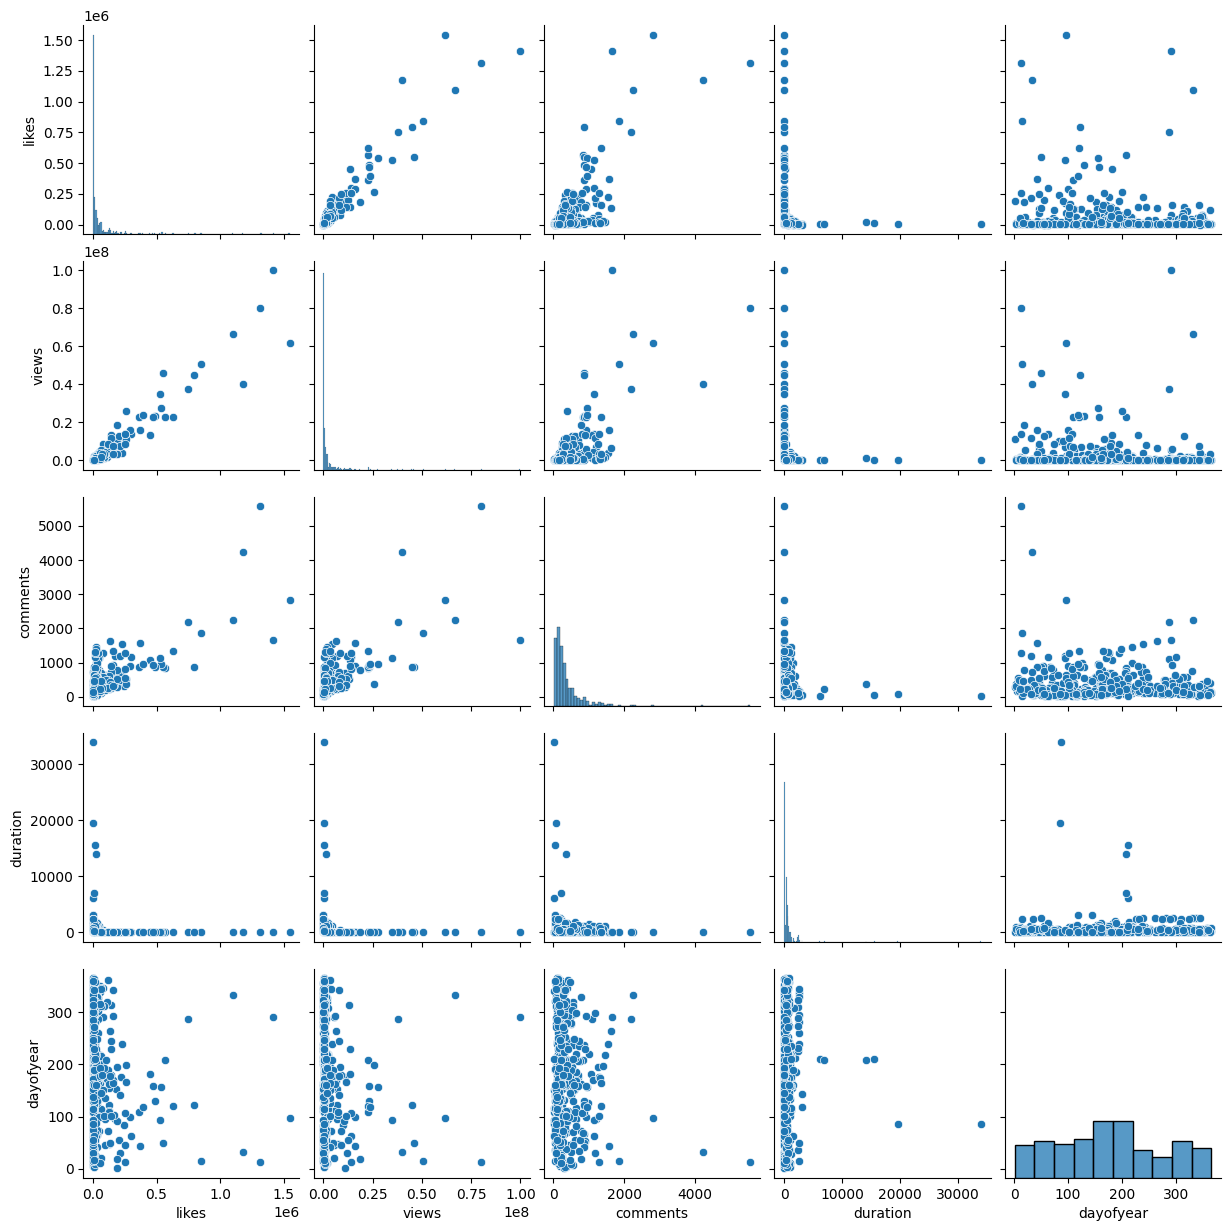

In [11]:
sns.pairplot(df_train[['likes', 'views', 'comments', 'duration', 'dayofyear']])
plt.show()

## Normality

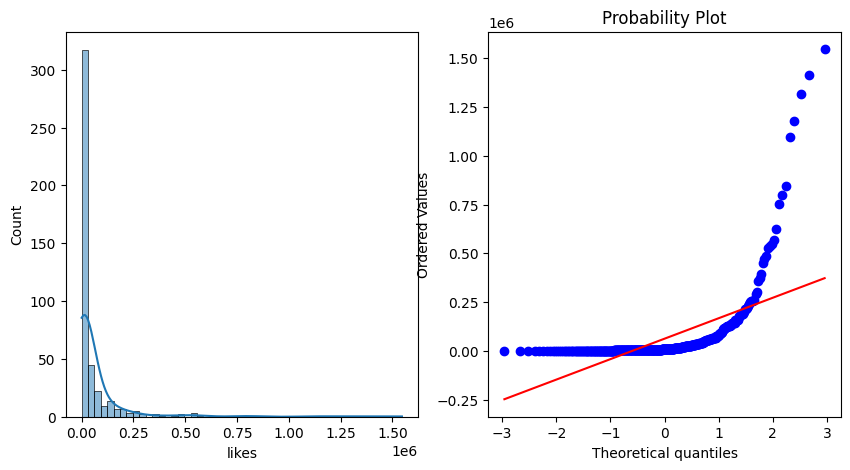

In [12]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
sns.histplot(df_train['likes'], kde=True, bins = 50)

plt.subplot(122)
import scipy.stats as stats
stats.probplot(df_train['likes'], dist=stats.norm, plot=plt)

plt.show()

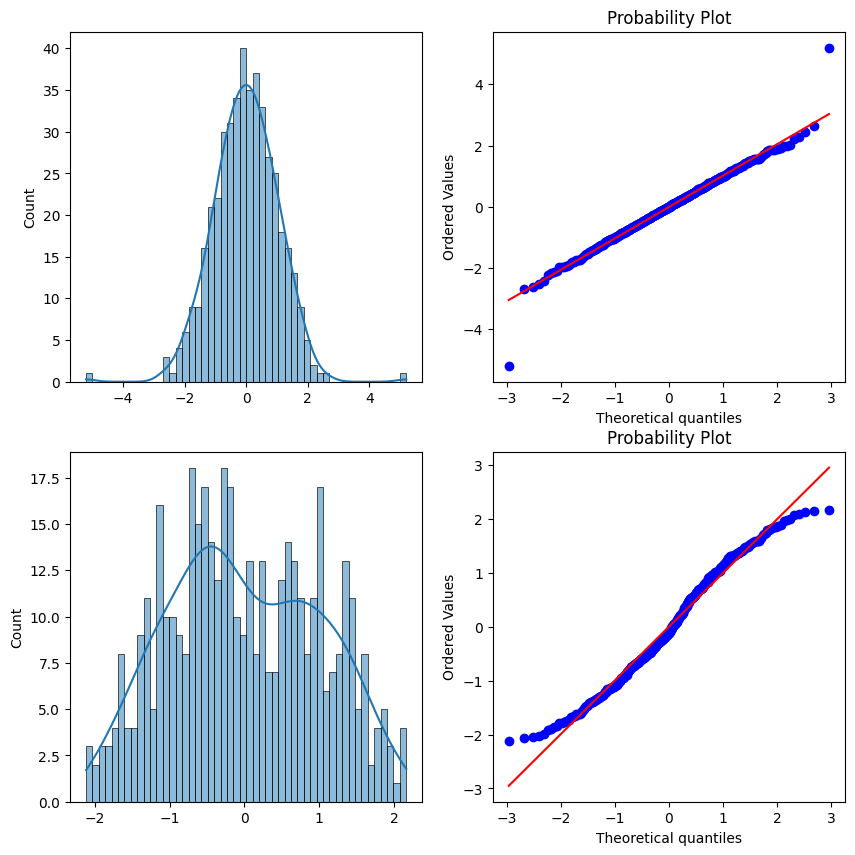

In [39]:
plt.figure(figsize = (10, 10))

from sklearn.preprocessing import QuantileTransformer
quantiletransform = QuantileTransformer(n_quantiles=30, output_distribution='normal', random_state=0).fit_transform(df_train[['likes']])[:, 0]

plt.subplot(221)
sns.histplot(quantiletransform, kde=True, bins = 50)

plt.subplot(222)
import scipy.stats as stats
stats.probplot(quantiletransform, dist=stats.norm, plot=plt)

from sklearn.preprocessing import PowerTransformer
powertransform = PowerTransformer(method='box-cox').fit_transform(df_train[['likes']])[:, 0]

plt.subplot(223)
sns.histplot(powertransform, kde=True, bins = 50)

plt.subplot(224)
stats.probplot(powertransform, dist=stats.norm, plot=plt)

plt.show()